In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from keras.preprocessing import image
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from keras.models import load_model
from keras.optimizers import Adam

2023-12-13 22:31:21.920475: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-13 22:31:22.041075: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 22:31:22.041113: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 22:31:22.041606: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 22:31:22.099956: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-13 22:31:22.100728: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
# Specify the path to the folder containing your images
dataset_path = "dataset_v2"

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(dataset_path) if f.endswith('.jpg')]  # Update the extension based on your image format

# Initialize an empty array to store the images
images = []
counter = 0

# Load and preprocess each image
for file_name in image_files:
    file_path = os.path.join(dataset_path, file_name)

    # Load the image using keras.preprocessing.image.load_img
    img = image.load_img(file_path)  # Adjust the target_size based on your requirements

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Preprocess the image (adjust as needed)
    img_array = img_array.astype(np.float32) / 255

    # Flatten the image and add it to the list
    images.append(img_array)

# Convert the list of images to a numpy array
X_train = np.array(images)
print("X_train shape:", X_train.shape)

# Reshape the images
X_train = X_train.reshape(X_train.shape[0], -1)  # -1 automatically computes the remaining dimension

print("X_train shape:", X_train.shape)

X_train shape: (150, 128, 128, 3)
X_train shape: (150, 49152)


In [3]:
def train_gan(generator, discriminator, gan, X_train, epochs=1, batch_size=128):
    batch_count = X_train.shape[0] // batch_size

    for e in range(epochs):
        for _ in range(batch_count):
            noise = np.random.normal(0, 1, size=[batch_size, 100])
            generated_images = generator.predict(noise)
            image_batch = X_train[np.random.randint(0, X_train.shape[0], size=batch_size)]
            discriminator.trainable = True
            d_loss_real = discriminator.train_on_batch(image_batch, np.ones(batch_size))
            d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros(batch_size))
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            noise = np.random.normal(0, 1, size=[batch_size, 100])
            discriminator.trainable = False
            g_loss = gan.train_on_batch(noise, np.ones(batch_size))

        print(f"Epoch {e}/{epochs}, D Loss: {d_loss}, G Loss: {g_loss}")

        if (e + 1) % 10 == 0:
            plot_generated_images(generator, e)

In [4]:
def plot_generated_images(generator, epoch, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 128, 128, 3)
    plt.figure(figsize=figsize)

    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow((generated_images[i] * 255).astype(np.uint8), cmap='viridis', interpolation="nearest")
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'gan_generated_image_epoch_{epoch+7000}.png')
    plt.show()

In [5]:
# Load Generator
loaded_generator = load_model("generator_model.h5")

# Load Discriminator
loaded_discriminator = load_model("discriminator_model.h5")

# Load GAN
loaded_gan = load_model("gan_model.h5")

# Compile the loaded models with the same optimizer and loss
loaded_generator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
loaded_discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
loaded_gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

2/2 [==============================] - 0s 23ms/step
Epoch 0/10000, D Loss: 0.3398273251950741, G Loss: 2.8760891238044373e-11
2/2 [==============================] - 0s 24ms/step
Epoch 1/10000, D Loss: 0.36250704154372215, G Loss: 1.0011157458578168e-09
2/2 [==============================] - 0s 22ms/step
Epoch 2/10000, D Loss: 0.37192683666944504, G Loss: 2.0339414597003724e-09
2/2 [==============================] - 0s 23ms/step
Epoch 3/10000, D Loss: 0.3385725561529398, G Loss: 1.9734009981675626e-09
2/2 [==============================] - 0s 26ms/step
Epoch 4/10000, D Loss: 0.38235320150852203, G Loss: 5.995811624970315e-10
2/2 [==============================] - 0s 25ms/step
Epoch 5/10000, D Loss: 0.39037617295980453, G Loss: 1.4096134259844462e-09
2/2 [==============================] - 0s 24ms/step
Epoch 6/10000, D Loss: 0.36625661700963974, G Loss: 1.407345240345137e-09
2/2 [==============================] - 0s 23ms/step
Epoch 7/10000, D Loss: 0.38911934942007065, G Loss: 6.153431653

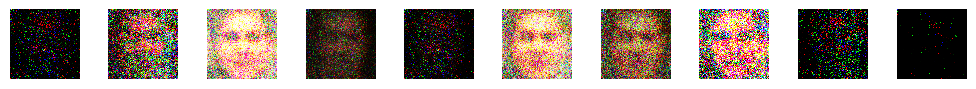

2/2 [==============================] - 0s 22ms/step
Epoch 10/10000, D Loss: 0.3891628161072731, G Loss: 3.81420839357105e-10
2/2 [==============================] - 0s 22ms/step
Epoch 11/10000, D Loss: 0.3600056879222393, G Loss: 7.634962884139895e-09
2/2 [==============================] - 0s 23ms/step
Epoch 12/10000, D Loss: 0.3715694509446621, G Loss: 3.997852715542649e-09
2/2 [==============================] - 0s 22ms/step
Epoch 13/10000, D Loss: 0.28780474327504635, G Loss: 4.1821496266081226e-10
2/2 [==============================] - 0s 22ms/step
Epoch 14/10000, D Loss: 0.36995531991124153, G Loss: 9.853859950226251e-10
2/2 [==============================] - 0s 22ms/step
Epoch 15/10000, D Loss: 0.34053631499409676, G Loss: 2.5369724099277846e-09
2/2 [==============================] - 0s 22ms/step
Epoch 16/10000, D Loss: 0.3884778432548046, G Loss: 4.881608894891087e-09
2/2 [==============================] - 0s 22ms/step
Epoch 17/10000, D Loss: 0.493714414536953, G Loss: 4.772020556

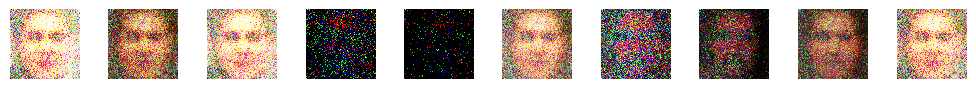

2/2 [==============================] - 0s 22ms/step
Epoch 20/10000, D Loss: 0.36537142284214497, G Loss: 3.027071260319758e-09
2/2 [==============================] - 0s 22ms/step
Epoch 21/10000, D Loss: 0.398110281676054, G Loss: 3.7496055149688345e-09
2/2 [==============================] - 0s 22ms/step
Epoch 22/10000, D Loss: 0.40806834027171135, G Loss: 4.471254200222319e-10
2/2 [==============================] - 0s 22ms/step
Epoch 23/10000, D Loss: 0.3450203016400337, G Loss: 7.485740360912985e-10
2/2 [==============================] - 0s 22ms/step
Epoch 24/10000, D Loss: 0.40396296977996826, G Loss: 2.5937192393854502e-09
2/2 [==============================] - 0s 22ms/step
Epoch 25/10000, D Loss: 0.33735379204154015, G Loss: 1.4338022991111643e-09
2/2 [==============================] - 0s 22ms/step
Epoch 26/10000, D Loss: 0.3685099221765995, G Loss: 2.3817087191346786e-10
2/2 [==============================] - 0s 22ms/step
Epoch 27/10000, D Loss: 0.30783617682754993, G Loss: 4.9980

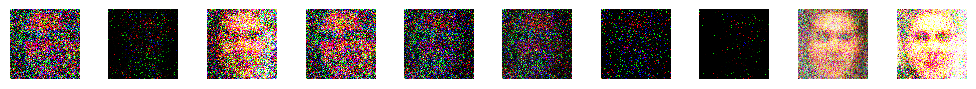

2/2 [==============================] - 0s 22ms/step
Epoch 30/10000, D Loss: 0.335589487105608, G Loss: 2.385710295982335e-09
2/2 [==============================] - 0s 22ms/step
Epoch 31/10000, D Loss: 0.3724644333124161, G Loss: 8.345852897662098e-09
2/2 [==============================] - 0s 22ms/step
Epoch 32/10000, D Loss: 0.38354091346263885, G Loss: 6.46013953442548e-09
2/2 [==============================] - 0s 22ms/step
Epoch 33/10000, D Loss: 0.35506466776132584, G Loss: 3.811517768070871e-10
2/2 [==============================] - 0s 22ms/step
Epoch 34/10000, D Loss: 0.4071148410439491, G Loss: 1.4705956452587543e-09
2/2 [==============================] - 0s 22ms/step
Epoch 35/10000, D Loss: 0.3427170068025589, G Loss: 3.928656289176047e-10
2/2 [==============================] - 0s 22ms/step
Epoch 36/10000, D Loss: 0.3382771164178848, G Loss: 5.773030387068445e-10
2/2 [==============================] - 0s 22ms/step
Epoch 37/10000, D Loss: 0.34485087916255, G Loss: 3.3744569361005

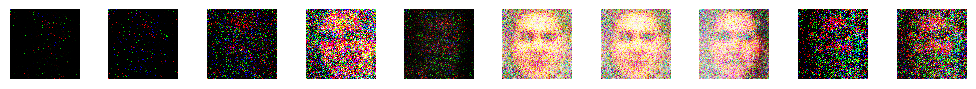

2/2 [==============================] - 0s 22ms/step
Epoch 40/10000, D Loss: 0.3780304491519928, G Loss: 1.161944318539554e-09
2/2 [==============================] - 0s 22ms/step
Epoch 41/10000, D Loss: 0.3334481194615364, G Loss: 1.8139972857156295e-09
2/2 [==============================] - 0s 22ms/step
Epoch 42/10000, D Loss: 0.32589836046099663, G Loss: 1.2044637509589506e-09
2/2 [==============================] - 0s 22ms/step
Epoch 43/10000, D Loss: 0.3628166690468788, G Loss: 9.504679709948505e-09
2/2 [==============================] - 0s 22ms/step
Epoch 44/10000, D Loss: 0.38023537769913673, G Loss: 8.988857658209781e-09
2/2 [==============================] - 0s 22ms/step
Epoch 45/10000, D Loss: 0.35937038995325565, G Loss: 1.2287312500802727e-08
2/2 [==============================] - 0s 22ms/step
Epoch 46/10000, D Loss: 0.3997880592942238, G Loss: 2.957747380349929e-10
2/2 [==============================] - 0s 22ms/step
Epoch 47/10000, D Loss: 0.36424051225185394, G Loss: 3.46335

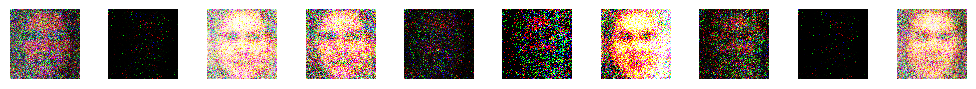

2/2 [==============================] - 0s 22ms/step
Epoch 50/10000, D Loss: 0.36109669134020805, G Loss: 1.7130428187073221e-09
2/2 [==============================] - 0s 23ms/step
Epoch 51/10000, D Loss: 0.34942103549838066, G Loss: 2.073261340385102e-09
2/2 [==============================] - 0s 22ms/step
Epoch 52/10000, D Loss: 0.401390029117465, G Loss: 7.168357019082805e-09
2/2 [==============================] - 0s 25ms/step
Epoch 53/10000, D Loss: 0.41840536519885063, G Loss: 8.648287641577213e-10
2/2 [==============================] - 0s 22ms/step
Epoch 54/10000, D Loss: 0.37571945786476135, G Loss: 2.638799401211145e-09
2/2 [==============================] - 0s 22ms/step
Epoch 55/10000, D Loss: 0.3497614059597254, G Loss: 2.3557762407477867e-09
2/2 [==============================] - 0s 22ms/step
Epoch 56/10000, D Loss: 0.41980729065835476, G Loss: 1.1223865586940107e-11
2/2 [==============================] - 0s 22ms/step
Epoch 57/10000, D Loss: 0.3519024960696697, G Loss: 1.50715

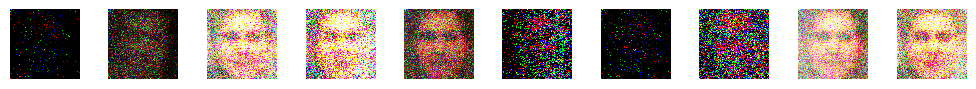

2/2 [==============================] - 0s 22ms/step
Epoch 60/10000, D Loss: 0.37845947220921516, G Loss: 8.329144596253002e-10
2/2 [==============================] - 0s 22ms/step
Epoch 61/10000, D Loss: 0.3796052820980549, G Loss: 2.8637483495685956e-09
2/2 [==============================] - 0s 22ms/step
Epoch 62/10000, D Loss: 0.3934249021112919, G Loss: 1.560149509582942e-10
2/2 [==============================] - 0s 22ms/step
Epoch 63/10000, D Loss: 0.37424561381340027, G Loss: 3.833195094671282e-09
2/2 [==============================] - 0s 22ms/step
Epoch 64/10000, D Loss: 0.3640233539044857, G Loss: 6.066101843060778e-09
2/2 [==============================] - 0s 22ms/step
Epoch 65/10000, D Loss: 0.3491765037178993, G Loss: 7.847259730908718e-09
2/2 [==============================] - 0s 22ms/step
Epoch 66/10000, D Loss: 0.30556778982281685, G Loss: 1.7128191087678601e-09
2/2 [==============================] - 0s 22ms/step
Epoch 67/10000, D Loss: 0.3312745504081249, G Loss: 1.1385090

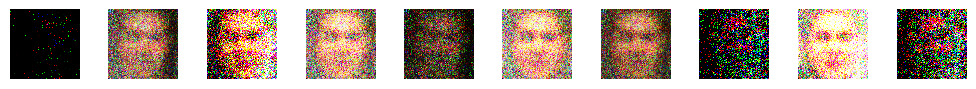

2/2 [==============================] - 0s 23ms/step
Epoch 70/10000, D Loss: 0.41253143176436424, G Loss: 1.1759688778312238e-09
2/2 [==============================] - 0s 22ms/step
Epoch 71/10000, D Loss: 0.376038059592247, G Loss: 1.9344698065637544e-10
2/2 [==============================] - 0s 23ms/step
Epoch 72/10000, D Loss: 0.41586995869874954, G Loss: 1.1487591322634216e-08
2/2 [==============================] - 0s 22ms/step
Epoch 73/10000, D Loss: 0.368010139092803, G Loss: 2.0156341040689085e-09
2/2 [==============================] - 0s 22ms/step
Epoch 74/10000, D Loss: 0.3161926195025444, G Loss: 2.3597777065731407e-09
2/2 [==============================] - 0s 22ms/step
Epoch 75/10000, D Loss: 0.3407299108803272, G Loss: 1.8429957560073262e-09
2/2 [==============================] - 0s 22ms/step
Epoch 76/10000, D Loss: 0.3754767198115587, G Loss: 5.9426046306043645e-09
2/2 [==============================] - 0s 22ms/step
Epoch 77/10000, D Loss: 0.32093321718275547, G Loss: 2.1389

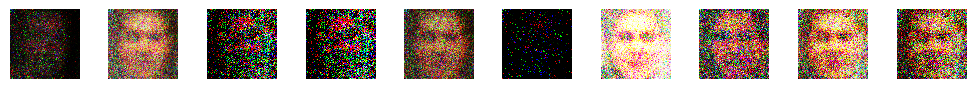

2/2 [==============================] - 0s 22ms/step
Epoch 80/10000, D Loss: 0.3148578815162182, G Loss: 1.8832968518012194e-09
2/2 [==============================] - 0s 22ms/step
Epoch 81/10000, D Loss: 0.38932115212082863, G Loss: 7.774855759201671e-10
2/2 [==============================] - 0s 22ms/step
Epoch 82/10000, D Loss: 0.3096499927341938, G Loss: 3.309342355706235e-09
2/2 [==============================] - 0s 22ms/step
Epoch 83/10000, D Loss: 0.32632614113390446, G Loss: 2.1506108005553415e-09
2/2 [==============================] - 0s 22ms/step
Epoch 84/10000, D Loss: 0.3457435891032219, G Loss: 7.166305326933298e-09
2/2 [==============================] - 0s 22ms/step
Epoch 85/10000, D Loss: 0.29134014062583447, G Loss: 1.018831026489142e-11
2/2 [==============================] - 0s 22ms/step
Epoch 86/10000, D Loss: 0.3592385835945606, G Loss: 9.52141587795552e-10
2/2 [==============================] - 0s 22ms/step
Epoch 87/10000, D Loss: 0.3961973488330841, G Loss: 3.10760528

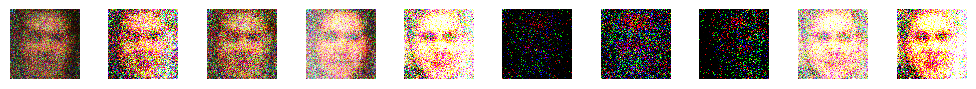

2/2 [==============================] - 0s 22ms/step
Epoch 90/10000, D Loss: 0.37778399139642715, G Loss: 3.6530878322338367e-10
2/2 [==============================] - 0s 22ms/step
Epoch 91/10000, D Loss: 0.34143379889428616, G Loss: 2.2960204570932063e-10
2/2 [==============================] - 0s 22ms/step
Epoch 92/10000, D Loss: 0.4032936431467533, G Loss: 6.551191145121038e-09
2/2 [==============================] - 0s 22ms/step
Epoch 93/10000, D Loss: 0.36082704924046993, G Loss: 3.3507455143855225e-10
2/2 [==============================] - 0s 22ms/step
Epoch 94/10000, D Loss: 0.3929382935166359, G Loss: 1.0627286828324145e-09
2/2 [==============================] - 0s 22ms/step
Epoch 95/10000, D Loss: 0.3097607847303152, G Loss: 6.781912254005817e-10
2/2 [==============================] - 0s 22ms/step
Epoch 96/10000, D Loss: 0.346910597756505, G Loss: 6.017011333625533e-09
2/2 [==============================] - 0s 22ms/step
Epoch 97/10000, D Loss: 0.32335496321320534, G Loss: 5.67207

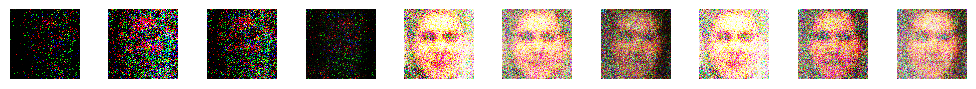

2/2 [==============================] - 0s 22ms/step
Epoch 100/10000, D Loss: 0.36005502194166183, G Loss: 1.6390032664403975e-09
2/2 [==============================] - 0s 22ms/step
Epoch 101/10000, D Loss: 0.4412232004106045, G Loss: 4.036302847509887e-09
2/2 [==============================] - 0s 22ms/step
Epoch 102/10000, D Loss: 0.3552373945713043, G Loss: 3.94545418558323e-09
2/2 [==============================] - 0s 22ms/step
Epoch 103/10000, D Loss: 0.3609145265072584, G Loss: 1.3389258590734698e-09
2/2 [==============================] - 0s 22ms/step
Epoch 104/10000, D Loss: 0.3072213735431433, G Loss: 2.7704800675820707e-09
2/2 [==============================] - 0s 22ms/step
Epoch 105/10000, D Loss: 0.3554035760462284, G Loss: 1.8928814071728084e-09
2/2 [==============================] - 0s 22ms/step
Epoch 106/10000, D Loss: 0.4147499818354845, G Loss: 1.3427484679695567e-09
2/2 [==============================] - 0s 22ms/step
Epoch 107/10000, D Loss: 0.35998929664492607, G Loss: 

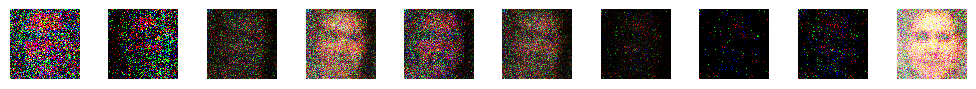

2/2 [==============================] - 0s 22ms/step
Epoch 110/10000, D Loss: 0.3389981538057327, G Loss: 2.1104833436424997e-09
2/2 [==============================] - 0s 22ms/step
Epoch 111/10000, D Loss: 0.24529757350683212, G Loss: 3.218752597788921e-09
2/2 [==============================] - 0s 22ms/step
Epoch 112/10000, D Loss: 0.38686519488692284, G Loss: 3.476704035776379e-09
2/2 [==============================] - 0s 22ms/step
Epoch 113/10000, D Loss: 0.33572421967983246, G Loss: 1.255469683769661e-08
2/2 [==============================] - 0s 22ms/step
Epoch 114/10000, D Loss: 0.36003588512539864, G Loss: 3.0549385243716642e-09
2/2 [==============================] - 0s 22ms/step
Epoch 115/10000, D Loss: 0.33121406845748425, G Loss: 7.412487984526095e-11
2/2 [==============================] - 0s 22ms/step
Epoch 116/10000, D Loss: 0.3405648544430733, G Loss: 6.462830270947961e-10
2/2 [==============================] - 0s 22ms/step
Epoch 117/10000, D Loss: 0.37907160073518753, G Loss

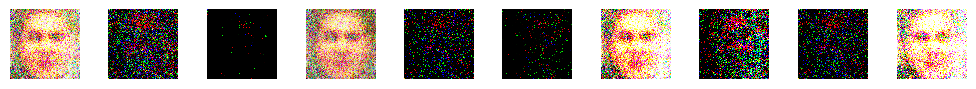

2/2 [==============================] - 0s 22ms/step
Epoch 120/10000, D Loss: 0.4067657943814993, G Loss: 1.3136226550969354e-09
2/2 [==============================] - 0s 22ms/step
Epoch 121/10000, D Loss: 0.38843948766589165, G Loss: 2.7986453154937863e-09
2/2 [==============================] - 0s 22ms/step
Epoch 122/10000, D Loss: 0.3500591665506363, G Loss: 1.4911171186682282e-09
2/2 [==============================] - 0s 22ms/step
Epoch 123/10000, D Loss: 0.36907623521983624, G Loss: 3.128793335527291e-10
2/2 [==============================] - 0s 22ms/step
Epoch 124/10000, D Loss: 0.35099777206778526, G Loss: 1.8085672959244903e-09
2/2 [==============================] - 0s 22ms/step
Epoch 125/10000, D Loss: 0.4123267810791731, G Loss: 6.156524623435189e-09
2/2 [==============================] - 0s 22ms/step
Epoch 126/10000, D Loss: 0.342638473957777, G Loss: 5.817931914009478e-09
2/2 [==============================] - 0s 22ms/step
Epoch 127/10000, D Loss: 0.32354179210960865, G Loss:

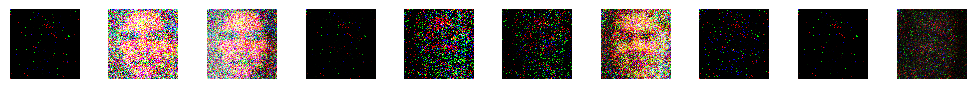

2/2 [==============================] - 0s 22ms/step
Epoch 130/10000, D Loss: 0.3257625438272953, G Loss: 6.4723577608560845e-09
2/2 [==============================] - 0s 22ms/step
Epoch 131/10000, D Loss: 0.3441063854843378, G Loss: 4.027924938032612e-10
2/2 [==============================] - 0s 21ms/step
Epoch 132/10000, D Loss: 0.41793941892683506, G Loss: 1.4185973284952524e-08
2/2 [==============================] - 0s 22ms/step
Epoch 133/10000, D Loss: 0.33402979746460915, G Loss: 1.9388393113217717e-09
2/2 [==============================] - 0s 22ms/step
Epoch 134/10000, D Loss: 0.32897476479411125, G Loss: 1.6241433753449996e-09
2/2 [==============================] - 0s 22ms/step
Epoch 135/10000, D Loss: 0.4233745448291302, G Loss: 1.9421091401738977e-09
2/2 [==============================] - 0s 22ms/step
Epoch 136/10000, D Loss: 0.35823559015989304, G Loss: 1.2594797427212256e-09
2/2 [==============================] - 0s 22ms/step
Epoch 137/10000, D Loss: 0.3555823341012001, G Lo

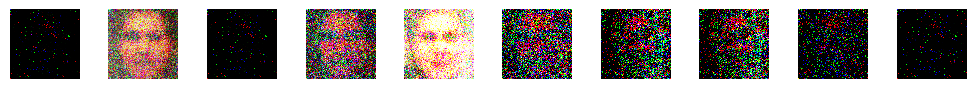

2/2 [==============================] - 0s 22ms/step
Epoch 140/10000, D Loss: 0.33263103291392326, G Loss: 2.428845458091189e-10
2/2 [==============================] - 0s 22ms/step
Epoch 141/10000, D Loss: 0.3745794855058193, G Loss: 1.688681727785024e-08
2/2 [==============================] - 0s 22ms/step
Epoch 142/10000, D Loss: 0.38666755706071854, G Loss: 2.2133901378396104e-09
2/2 [==============================] - 0s 22ms/step
Epoch 143/10000, D Loss: 0.3637832421809435, G Loss: 4.7759010080028474e-09
2/2 [==============================] - 0s 22ms/step
Epoch 144/10000, D Loss: 0.29984720051288605, G Loss: 8.973525811306615e-10
2/2 [==============================] - 0s 22ms/step
Epoch 145/10000, D Loss: 0.3355065658688545, G Loss: 3.646762614106791e-10
2/2 [==============================] - 0s 22ms/step
Epoch 146/10000, D Loss: 0.3150866962969303, G Loss: 2.5345803233989272e-09
2/2 [==============================] - 0s 22ms/step
Epoch 147/10000, D Loss: 0.36353249102830887, G Loss:

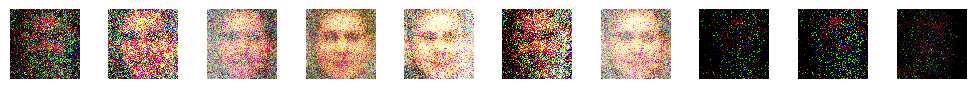

2/2 [==============================] - 0s 23ms/step
Epoch 150/10000, D Loss: 0.3653343878686428, G Loss: 9.368532616349512e-10
2/2 [==============================] - 0s 22ms/step
Epoch 151/10000, D Loss: 0.3071257621049881, G Loss: 5.643686629142053e-10
2/2 [==============================] - 0s 22ms/step
Epoch 152/10000, D Loss: 0.30710568465292454, G Loss: 5.527586721676414e-10
2/2 [==============================] - 0s 22ms/step
Epoch 153/10000, D Loss: 0.34398171678185463, G Loss: 1.703451046886073e-09
2/2 [==============================] - 0s 22ms/step
Epoch 154/10000, D Loss: 0.34647843427956104, G Loss: 6.296505539182817e-10
2/2 [==============================] - 0s 22ms/step
Epoch 155/10000, D Loss: 0.3945581279695034, G Loss: 7.018315373308326e-10
2/2 [==============================] - 0s 22ms/step
Epoch 156/10000, D Loss: 0.34061966091394424, G Loss: 3.3878806426912433e-09
2/2 [==============================] - 0s 22ms/step
Epoch 157/10000, D Loss: 0.41497678495943546, G Loss: 

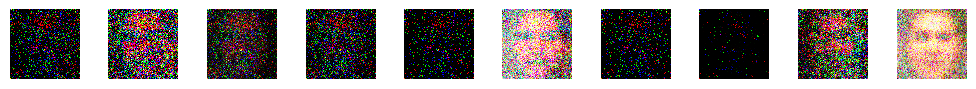

2/2 [==============================] - 0s 21ms/step
Epoch 160/10000, D Loss: 0.35652774199843407, G Loss: 2.013085698138184e-09
2/2 [==============================] - 0s 22ms/step
Epoch 161/10000, D Loss: 0.32537108287215233, G Loss: 3.368564538419605e-09
2/2 [==============================] - 0s 22ms/step
Epoch 162/10000, D Loss: 0.3827132172882557, G Loss: 2.6480084791558056e-10
2/2 [==============================] - 0s 22ms/step
Epoch 163/10000, D Loss: 0.40248413011431694, G Loss: 8.329875456070113e-09
2/2 [==============================] - 0s 22ms/step
Epoch 164/10000, D Loss: 0.42192186042666435, G Loss: 2.698322676408793e-10
2/2 [==============================] - 0s 22ms/step
Epoch 165/10000, D Loss: 0.34837449342012405, G Loss: 7.34148963843495e-09
2/2 [==============================] - 0s 22ms/step
Epoch 166/10000, D Loss: 0.3915318697690964, G Loss: 3.256332314904853e-09
2/2 [==============================] - 0s 22ms/step
Epoch 167/10000, D Loss: 0.3299830909818411, G Loss: 5

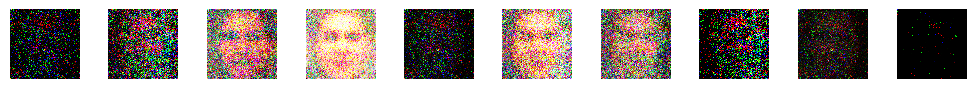

2/2 [==============================] - 0s 24ms/step
Epoch 170/10000, D Loss: 0.3754151910543442, G Loss: 1.0012323192754025e-09
2/2 [==============================] - 0s 24ms/step
Epoch 171/10000, D Loss: 0.3087026830762625, G Loss: 3.858415809077087e-10
2/2 [==============================] - 0s 22ms/step
Epoch 172/10000, D Loss: 0.32105124182999134, G Loss: 5.0713850896499935e-09
2/2 [==============================] - 0s 22ms/step
Epoch 173/10000, D Loss: 0.3814590387046337, G Loss: 1.1279002037900554e-10
2/2 [==============================] - 0s 22ms/step
Epoch 174/10000, D Loss: 0.3605361618101597, G Loss: 8.16873735320911e-10
2/2 [==============================] - 0s 22ms/step
Epoch 175/10000, D Loss: 0.34702370688319206, G Loss: 3.3199205606848636e-09
2/2 [==============================] - 0s 22ms/step
Epoch 176/10000, D Loss: 0.34926503524184227, G Loss: 2.110147612199853e-09
2/2 [==============================] - 0s 22ms/step
Epoch 177/10000, D Loss: 0.36152052134275436, G Loss:

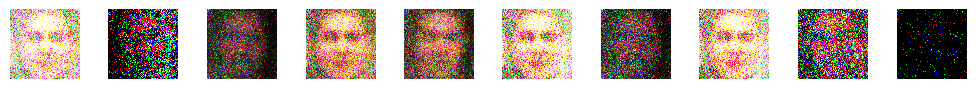

2/2 [==============================] - 0s 22ms/step
Epoch 180/10000, D Loss: 0.3856425993144512, G Loss: 1.9533909212388068e-10
2/2 [==============================] - 0s 22ms/step
Epoch 181/10000, D Loss: 0.35621459037065506, G Loss: 3.2454091497546855e-11
2/2 [==============================] - 0s 22ms/step
Epoch 182/10000, D Loss: 0.35067523643374443, G Loss: 2.068649029851599e-09
2/2 [==============================] - 0s 22ms/step
Epoch 183/10000, D Loss: 0.2900021094828844, G Loss: 5.3852500236928336e-09
2/2 [==============================] - 0s 22ms/step
Epoch 184/10000, D Loss: 0.33847351744771004, G Loss: 1.001860150395828e-09
2/2 [==============================] - 0s 22ms/step
Epoch 185/10000, D Loss: 0.3401720002293587, G Loss: 1.2617659805869152e-08
2/2 [==============================] - 0s 22ms/step
Epoch 186/10000, D Loss: 0.3275921493768692, G Loss: 1.6146877168665696e-09
2/2 [==============================] - 0s 22ms/step
Epoch 187/10000, D Loss: 0.4164910241961479, G Loss

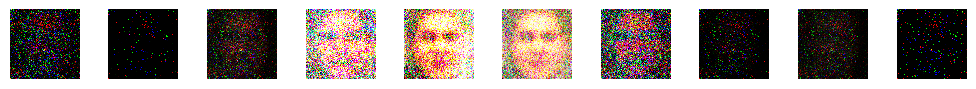

2/2 [==============================] - 0s 23ms/step
Epoch 190/10000, D Loss: 0.35135091096162796, G Loss: 8.482272106924427e-10
2/2 [==============================] - 0s 22ms/step
Epoch 191/10000, D Loss: 0.3797605484724045, G Loss: 1.1985212822196445e-09
2/2 [==============================] - 0s 22ms/step
Epoch 192/10000, D Loss: 0.3500894494354725, G Loss: 1.001370208975061e-09
2/2 [==============================] - 0s 22ms/step
Epoch 193/10000, D Loss: 0.3327499534934759, G Loss: 8.731473877254814e-10
2/2 [==============================] - 0s 22ms/step
Epoch 194/10000, D Loss: 0.38717783987522125, G Loss: 1.7433418042500648e-09
2/2 [==============================] - 0s 22ms/step
Epoch 195/10000, D Loss: 0.3828852213919163, G Loss: 1.0506794545506182e-08
2/2 [==============================] - 0s 22ms/step
Epoch 196/10000, D Loss: 0.3187858723104, G Loss: 9.355561658708211e-09
2/2 [==============================] - 0s 22ms/step
Epoch 197/10000, D Loss: 0.31568564660847187, G Loss: 1.1

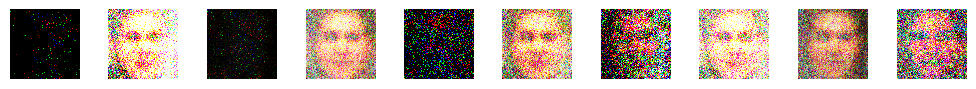

2/2 [==============================] - 0s 22ms/step
Epoch 200/10000, D Loss: 0.3347785398364067, G Loss: 4.697716438073485e-09
2/2 [==============================] - 0s 22ms/step
Epoch 201/10000, D Loss: 0.4368278309702873, G Loss: 1.2312381114654158e-09
2/2 [==============================] - 0s 22ms/step
Epoch 202/10000, D Loss: 0.3435818161815405, G Loss: 2.048814673472066e-09
2/2 [==============================] - 0s 22ms/step
Epoch 203/10000, D Loss: 0.27105202339589596, G Loss: 6.347557146568761e-09
2/2 [==============================] - 0s 22ms/step
Epoch 204/10000, D Loss: 0.3504404313862324, G Loss: 4.593285307663564e-09
2/2 [==============================] - 0s 22ms/step
Epoch 205/10000, D Loss: 0.3276494797319174, G Loss: 8.292745157234549e-09
2/2 [==============================] - 0s 22ms/step
Epoch 206/10000, D Loss: 0.3548453822731972, G Loss: 1.8542975488422542e-10
2/2 [==============================] - 0s 22ms/step
Epoch 207/10000, D Loss: 0.3793089799582958, G Loss: 1.8

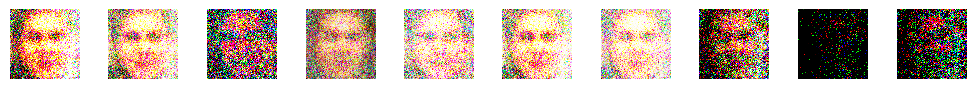

2/2 [==============================] - 0s 22ms/step
Epoch 210/10000, D Loss: 0.3141118064522743, G Loss: 1.0583860454715932e-09
2/2 [==============================] - 0s 22ms/step
Epoch 211/10000, D Loss: 0.35807644203305244, G Loss: 8.538671103508477e-09
2/2 [==============================] - 0s 22ms/step
Epoch 212/10000, D Loss: 0.3187845591455698, G Loss: 4.75185779613696e-10
2/2 [==============================] - 0s 22ms/step
Epoch 213/10000, D Loss: 0.3728144094347954, G Loss: 4.283991494880013e-10
2/2 [==============================] - 0s 22ms/step
Epoch 214/10000, D Loss: 0.37896711751818657, G Loss: 2.6187556567691672e-09
2/2 [==============================] - 0s 22ms/step
Epoch 215/10000, D Loss: 0.32963408902287483, G Loss: 3.0214868385058935e-09
2/2 [==============================] - 0s 22ms/step
Epoch 216/10000, D Loss: 0.36500641144812107, G Loss: 2.717318037248617e-10
2/2 [==============================] - 0s 22ms/step
Epoch 217/10000, D Loss: 0.3698472324758768, G Loss: 

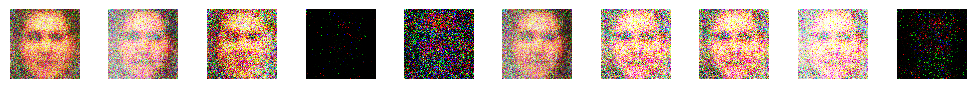

2/2 [==============================] - 0s 22ms/step
Epoch 220/10000, D Loss: 0.41054021567106247, G Loss: 1.5421119936576133e-10
2/2 [==============================] - 0s 22ms/step
Epoch 221/10000, D Loss: 0.32030661776661873, G Loss: 2.0799939548510338e-10
2/2 [==============================] - 0s 22ms/step
Epoch 222/10000, D Loss: 0.3546714149415493, G Loss: 4.171308576328414e-10
2/2 [==============================] - 0s 22ms/step
Epoch 223/10000, D Loss: 0.3840244933962822, G Loss: 5.235967215355686e-09
2/2 [==============================] - 0s 22ms/step
Epoch 224/10000, D Loss: 0.38158074766397476, G Loss: 7.610490015963478e-09
2/2 [==============================] - 0s 22ms/step
Epoch 225/10000, D Loss: 0.38701727613806725, G Loss: 1.5378452955516764e-09
2/2 [==============================] - 0s 22ms/step
Epoch 226/10000, D Loss: 0.3606069032102823, G Loss: 6.232018234797465e-10
2/2 [==============================] - 0s 22ms/step
Epoch 227/10000, D Loss: 0.3143221288919449, G Loss:

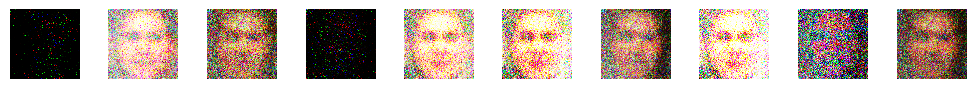

2/2 [==============================] - 0s 22ms/step
Epoch 230/10000, D Loss: 0.3967615030705929, G Loss: 2.771290530390047e-09
2/2 [==============================] - 0s 22ms/step
Epoch 231/10000, D Loss: 0.34899795800447464, G Loss: 1.1296912294511685e-09
2/2 [==============================] - 0s 22ms/step
Epoch 232/10000, D Loss: 0.31450823694467545, G Loss: 9.444385273837952e-10
2/2 [==============================] - 0s 22ms/step
Epoch 233/10000, D Loss: 0.3948325142264366, G Loss: 4.574719214556211e-10
2/2 [==============================] - 0s 22ms/step
Epoch 234/10000, D Loss: 0.387158140540123, G Loss: 3.178305618689592e-09
2/2 [==============================] - 0s 22ms/step
Epoch 235/10000, D Loss: 0.32423236407339573, G Loss: 2.405805998861865e-09
2/2 [==============================] - 0s 22ms/step
Epoch 236/10000, D Loss: 0.3119382616132498, G Loss: 9.536736955695346e-10
2/2 [==============================] - 0s 22ms/step
Epoch 237/10000, D Loss: 0.3968528285622597, G Loss: 3.5

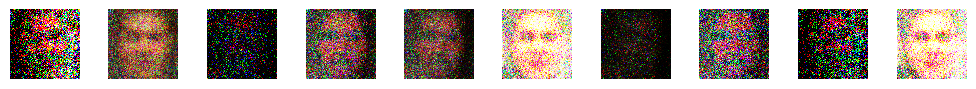

2/2 [==============================] - 0s 23ms/step
Epoch 240/10000, D Loss: 0.4214320722967386, G Loss: 9.59964996383178e-10
2/2 [==============================] - 0s 23ms/step
Epoch 241/10000, D Loss: 0.363964457064867, G Loss: 1.4372949497243326e-09
2/2 [==============================] - 0s 26ms/step
Epoch 242/10000, D Loss: 0.39469901844859123, G Loss: 7.745435959272129e-10
2/2 [==============================] - 0s 23ms/step
Epoch 243/10000, D Loss: 0.34963880479335785, G Loss: 8.882615754046697e-10
2/2 [==============================] - 0s 25ms/step
Epoch 244/10000, D Loss: 0.38888590782880783, G Loss: 5.6183061675207924e-11
2/2 [==============================] - 0s 22ms/step
Epoch 245/10000, D Loss: 0.3909950777888298, G Loss: 1.5705765576967678e-09
2/2 [==============================] - 0s 22ms/step
Epoch 246/10000, D Loss: 0.3686154540628195, G Loss: 3.339660548107304e-09
2/2 [==============================] - 0s 24ms/step
Epoch 247/10000, D Loss: 0.3760877437889576, G Loss: 1.

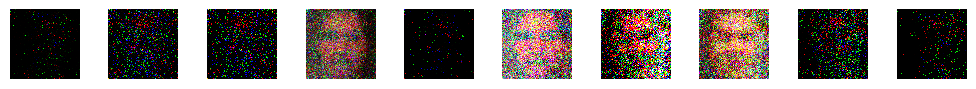

2/2 [==============================] - 0s 22ms/step
Epoch 250/10000, D Loss: 0.3431351874023676, G Loss: 2.8271071594865305e-10
2/2 [==============================] - 0s 23ms/step
Epoch 251/10000, D Loss: 0.34076048247516155, G Loss: 9.21160592248782e-10
2/2 [==============================] - 0s 22ms/step
Epoch 252/10000, D Loss: 0.39516359008848667, G Loss: 3.2063746102650725e-10
2/2 [==============================] - 0s 28ms/step
Epoch 253/10000, D Loss: 0.34941590949893, G Loss: 2.119510122966517e-09
2/2 [==============================] - 0s 22ms/step
Epoch 254/10000, D Loss: 0.3728846777230501, G Loss: 2.1588811294215304e-10
2/2 [==============================] - 0s 22ms/step
Epoch 255/10000, D Loss: 0.3778069466352463, G Loss: 9.17557363422361e-10
2/2 [==============================] - 0s 22ms/step
Epoch 256/10000, D Loss: 0.3754304237663746, G Loss: 7.176294974930997e-11
2/2 [==============================] - 0s 22ms/step
Epoch 257/10000, D Loss: 0.38093556836247444, G Loss: 6.04

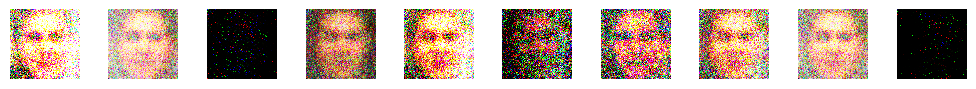

2/2 [==============================] - 0s 22ms/step
Epoch 260/10000, D Loss: 0.33544568344950676, G Loss: 5.15127496214518e-09
2/2 [==============================] - 0s 22ms/step
Epoch 261/10000, D Loss: 0.3628910258412361, G Loss: 1.5156695343243598e-10
2/2 [==============================] - 0s 23ms/step
Epoch 262/10000, D Loss: 0.37431422993540764, G Loss: 2.3972160367868867e-10
2/2 [==============================] - 0s 22ms/step
Epoch 263/10000, D Loss: 0.3993185181170702, G Loss: 3.477900412107715e-09
2/2 [==============================] - 0s 22ms/step
Epoch 264/10000, D Loss: 0.34679197147488594, G Loss: 3.871283293932493e-09
2/2 [==============================] - 0s 22ms/step
Epoch 265/10000, D Loss: 0.31472545489668846, G Loss: 5.972944361332111e-10
2/2 [==============================] - 0s 22ms/step
Epoch 266/10000, D Loss: 0.3096446357667446, G Loss: 2.416282729456043e-09
2/2 [==============================] - 0s 22ms/step
Epoch 267/10000, D Loss: 0.38800298795104027, G Loss: 

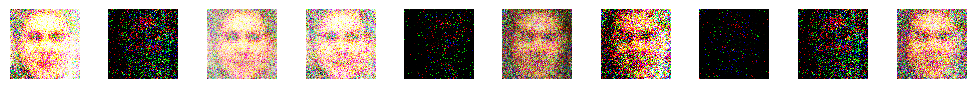

2/2 [==============================] - 0s 22ms/step
Epoch 270/10000, D Loss: 0.3745156154036522, G Loss: 1.5425944965841154e-08
2/2 [==============================] - 0s 22ms/step
Epoch 271/10000, D Loss: 0.3571869134902954, G Loss: 1.0837246655626132e-08
2/2 [==============================] - 0s 22ms/step
Epoch 272/10000, D Loss: 0.3422449789941311, G Loss: 5.062927299626097e-10
2/2 [==============================] - 0s 22ms/step
Epoch 273/10000, D Loss: 0.3053832743316889, G Loss: 1.5683154774848163e-09
2/2 [==============================] - 0s 22ms/step
Epoch 274/10000, D Loss: 0.3440466672182083, G Loss: 8.073588908530382e-09
2/2 [==============================] - 0s 22ms/step
Epoch 275/10000, D Loss: 0.35565737821161747, G Loss: 5.539097513995728e-10
2/2 [==============================] - 0s 22ms/step
Epoch 276/10000, D Loss: 0.363087460398674, G Loss: 2.8602828994195306e-09
2/2 [==============================] - 0s 22ms/step
Epoch 277/10000, D Loss: 0.34652430191636086, G Loss: 3

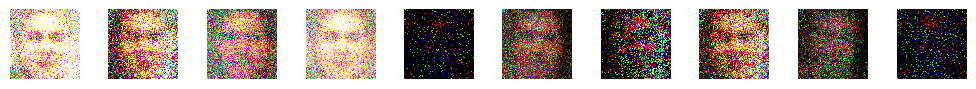

2/2 [==============================] - 0s 22ms/step
Epoch 280/10000, D Loss: 0.34985754266381264, G Loss: 1.4448138518918796e-10
2/2 [==============================] - 0s 22ms/step
Epoch 281/10000, D Loss: 0.3533505816012621, G Loss: 3.1255389942863587e-10
2/2 [==============================] - 0s 22ms/step
Epoch 282/10000, D Loss: 0.4123945012688637, G Loss: 5.701779048905564e-09
2/2 [==============================] - 0s 22ms/step
Epoch 283/10000, D Loss: 0.38236314430832863, G Loss: 1.1288170398415787e-09
2/2 [==============================] - 0s 22ms/step
Epoch 284/10000, D Loss: 0.35579200461506844, G Loss: 6.831963883513481e-10
2/2 [==============================] - 0s 22ms/step
Epoch 285/10000, D Loss: 0.4029640182852745, G Loss: 5.708835626450082e-09
2/2 [==============================] - 0s 23ms/step
Epoch 286/10000, D Loss: 0.34859372302889824, G Loss: 2.8815555844219354e-11
2/2 [==============================] - 0s 22ms/step
Epoch 287/10000, D Loss: 0.3344687782227993, G Loss

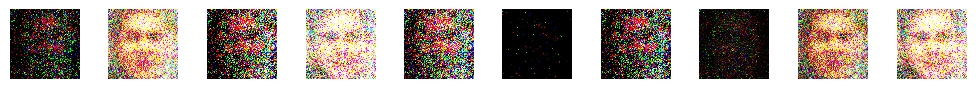

2/2 [==============================] - 0s 22ms/step
Epoch 290/10000, D Loss: 0.3167243357747793, G Loss: 4.1457057231575334e-10
2/2 [==============================] - 0s 22ms/step
Epoch 291/10000, D Loss: 0.3570595346391201, G Loss: 1.8698301240682724e-10
2/2 [==============================] - 0s 22ms/step
Epoch 292/10000, D Loss: 0.37869859859347343, G Loss: 2.2887767237023127e-09
2/2 [==============================] - 0s 22ms/step
Epoch 293/10000, D Loss: 0.3992999605834484, G Loss: 1.6593294516198398e-09
2/2 [==============================] - 0s 22ms/step
Epoch 294/10000, D Loss: 0.3381993696093559, G Loss: 8.420475428039254e-10
2/2 [==============================] - 0s 22ms/step
Epoch 295/10000, D Loss: 0.40854120068252087, G Loss: 2.3056481168737264e-09
2/2 [==============================] - 0s 22ms/step
Epoch 296/10000, D Loss: 0.37862988747656345, G Loss: 6.557269838225466e-09
2/2 [==============================] - 0s 22ms/step
Epoch 297/10000, D Loss: 0.38642761670053005, G Los

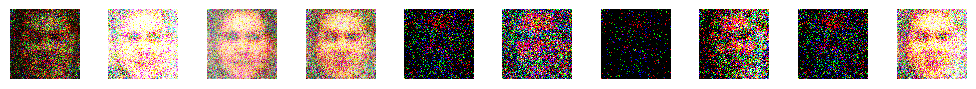

2/2 [==============================] - 0s 22ms/step
Epoch 300/10000, D Loss: 0.3797506242990494, G Loss: 1.971602214823065e-09
2/2 [==============================] - 0s 22ms/step
Epoch 301/10000, D Loss: 0.3257616125047207, G Loss: 2.054560521713711e-09
2/2 [==============================] - 0s 22ms/step
Epoch 302/10000, D Loss: 0.3647613450884819, G Loss: 1.5633841998763387e-09
2/2 [==============================] - 0s 22ms/step
Epoch 303/10000, D Loss: 0.3320395667105913, G Loss: 4.670591913225053e-09
2/2 [==============================] - 0s 22ms/step
Epoch 304/10000, D Loss: 0.35595691204071045, G Loss: 1.6343527642348477e-09
2/2 [==============================] - 0s 22ms/step
Epoch 305/10000, D Loss: 0.3160628732293844, G Loss: 4.5894835154491886e-10
2/2 [==============================] - 0s 23ms/step
Epoch 306/10000, D Loss: 0.3258650489151478, G Loss: 2.378308661121764e-10
2/2 [==============================] - 0s 22ms/step
Epoch 307/10000, D Loss: 0.31972407177090645, G Loss: 5

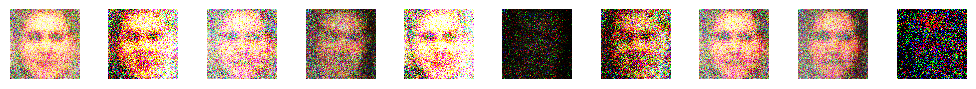

2/2 [==============================] - 0s 22ms/step
Epoch 310/10000, D Loss: 0.3481356352567673, G Loss: 1.5174818068786067e-09
2/2 [==============================] - 0s 24ms/step
Epoch 311/10000, D Loss: 0.31881492026150227, G Loss: 5.834678296068319e-10
2/2 [==============================] - 0s 22ms/step
Epoch 312/10000, D Loss: 0.30742741003632545, G Loss: 3.142247573251211e-09
2/2 [==============================] - 0s 23ms/step
Epoch 313/10000, D Loss: 0.3546416014432907, G Loss: 2.5960087413068322e-09
2/2 [==============================] - 0s 22ms/step
Epoch 314/10000, D Loss: 0.3532693888992071, G Loss: 3.027403217004121e-09
2/2 [==============================] - 0s 22ms/step
Epoch 315/10000, D Loss: 0.3847658559679985, G Loss: 3.1741433925702722e-09
2/2 [==============================] - 0s 22ms/step
Epoch 316/10000, D Loss: 0.38820356875658035, G Loss: 1.1116511045017319e-09
2/2 [==============================] - 0s 22ms/step
Epoch 317/10000, D Loss: 0.2969265282154083, G Loss:

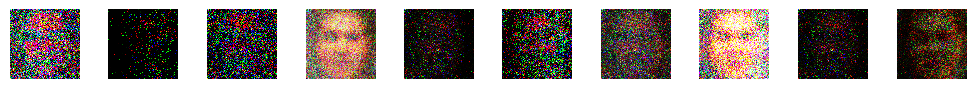

2/2 [==============================] - 0s 22ms/step
Epoch 320/10000, D Loss: 0.37585364282131195, G Loss: 2.778594465624451e-09
2/2 [==============================] - 0s 22ms/step
Epoch 321/10000, D Loss: 0.35995853692293167, G Loss: 2.666131093675972e-09
2/2 [==============================] - 0s 22ms/step
Epoch 322/10000, D Loss: 0.3457714766263962, G Loss: 2.3834618306795008e-11
2/2 [==============================] - 0s 22ms/step
Epoch 323/10000, D Loss: 0.34365957230329514, G Loss: 7.053132744516688e-09
2/2 [==============================] - 0s 22ms/step
Epoch 324/10000, D Loss: 0.3359370268881321, G Loss: 4.976011602764174e-09
2/2 [==============================] - 0s 22ms/step
Epoch 325/10000, D Loss: 0.38071707636117935, G Loss: 2.5190036723188314e-09
2/2 [==============================] - 0s 22ms/step
Epoch 326/10000, D Loss: 0.40559726022183895, G Loss: 5.315034003194885e-12
2/2 [==============================] - 0s 22ms/step
Epoch 327/10000, D Loss: 0.3333559352904558, G Loss:

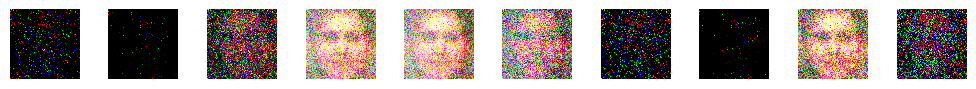

2/2 [==============================] - 0s 22ms/step
Epoch 330/10000, D Loss: 0.3451845869421959, G Loss: 1.3639274154542136e-09
2/2 [==============================] - 0s 22ms/step
Epoch 331/10000, D Loss: 0.36064839735627174, G Loss: 8.32259594574225e-09
2/2 [==============================] - 0s 22ms/step
Epoch 332/10000, D Loss: 0.3210446387529373, G Loss: 6.311767997146944e-09
2/2 [==============================] - 0s 22ms/step
Epoch 333/10000, D Loss: 0.3551195040345192, G Loss: 4.974019529591089e-10
2/2 [==============================] - 0s 22ms/step
Epoch 334/10000, D Loss: 0.3181505426764488, G Loss: 3.866774900274095e-09
2/2 [==============================] - 0s 22ms/step
Epoch 335/10000, D Loss: 0.3471659794449806, G Loss: 2.6528161889416424e-09
2/2 [==============================] - 0s 22ms/step
Epoch 336/10000, D Loss: 0.35321775265038013, G Loss: 1.1763944263165627e-09
2/2 [==============================] - 0s 22ms/step
Epoch 337/10000, D Loss: 0.3393282778561115, G Loss: 1.

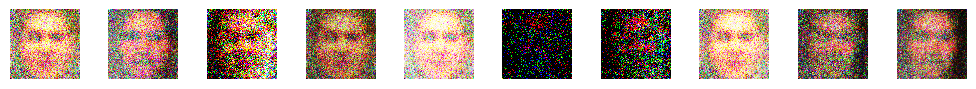

2/2 [==============================] - 0s 22ms/step
Epoch 340/10000, D Loss: 0.41556166857481003, G Loss: 7.653772726712305e-09
2/2 [==============================] - 0s 22ms/step
Epoch 341/10000, D Loss: 0.3489215727895498, G Loss: 1.0625330615354756e-09
2/2 [==============================] - 0s 22ms/step
Epoch 342/10000, D Loss: 0.3474328815937042, G Loss: 1.225987844577503e-08
2/2 [==============================] - 0s 22ms/step
Epoch 343/10000, D Loss: 0.3748752400279045, G Loss: 9.937562994721816e-10
2/2 [==============================] - 0s 22ms/step
Epoch 344/10000, D Loss: 0.3707781434059143, G Loss: 1.1495694396401746e-09
2/2 [==============================] - 0s 22ms/step
Epoch 345/10000, D Loss: 0.36288974061608315, G Loss: 1.357150725134204e-09
2/2 [==============================] - 0s 22ms/step
Epoch 346/10000, D Loss: 0.3717785608023405, G Loss: 1.1458780591055984e-09
2/2 [==============================] - 0s 22ms/step
Epoch 347/10000, D Loss: 0.4089404307305813, G Loss: 1

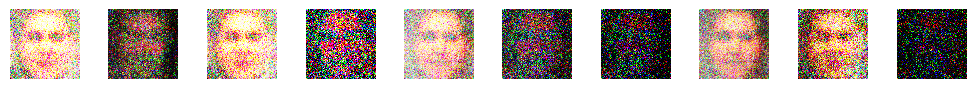

2/2 [==============================] - 0s 24ms/step
Epoch 350/10000, D Loss: 0.382867980748415, G Loss: 8.007504659346409e-10
2/2 [==============================] - 0s 22ms/step
Epoch 351/10000, D Loss: 0.3458481840789318, G Loss: 1.7605229774009246e-11
2/2 [==============================] - 0s 22ms/step
Epoch 352/10000, D Loss: 0.38452939689159393, G Loss: 3.4494511691463003e-09
2/2 [==============================] - 0s 22ms/step
Epoch 353/10000, D Loss: 0.31294815242290497, G Loss: 2.4596309433633223e-09
2/2 [==============================] - 0s 22ms/step
Epoch 354/10000, D Loss: 0.31919817067682743, G Loss: 1.9732677714046076e-09
2/2 [==============================] - 0s 21ms/step
Epoch 355/10000, D Loss: 0.34193001687526703, G Loss: 2.1679282813380496e-09
2/2 [==============================] - 0s 22ms/step
Epoch 356/10000, D Loss: 0.42927880957722664, G Loss: 1.98167215970102e-09
2/2 [==============================] - 0s 22ms/step
Epoch 357/10000, D Loss: 0.3338531143963337, G Loss

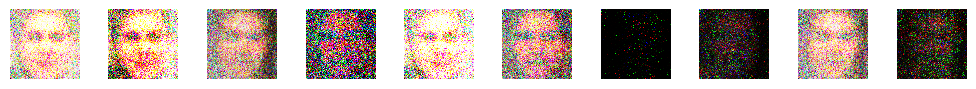

2/2 [==============================] - 0s 22ms/step
Epoch 360/10000, D Loss: 0.3188224472105503, G Loss: 1.951864891935884e-09
2/2 [==============================] - 0s 22ms/step
Epoch 361/10000, D Loss: 0.3445631302893162, G Loss: 4.002033426875329e-10
2/2 [==============================] - 0s 22ms/step
Epoch 362/10000, D Loss: 0.33209726959466934, G Loss: 1.6357816490231158e-10
2/2 [==============================] - 0s 22ms/step
Epoch 363/10000, D Loss: 0.36482880264520645, G Loss: 5.889174148343557e-10
2/2 [==============================] - 0s 22ms/step
Epoch 364/10000, D Loss: 0.4100715331733227, G Loss: 8.64996962945952e-09
2/2 [==============================] - 0s 22ms/step
Epoch 365/10000, D Loss: 0.40182141214609146, G Loss: 2.21437049252593e-10
2/2 [==============================] - 0s 22ms/step
Epoch 366/10000, D Loss: 0.3335276283323765, G Loss: 2.0232462372149485e-09
2/2 [==============================] - 0s 22ms/step
Epoch 367/10000, D Loss: 0.37688038498163223, G Loss: 3.

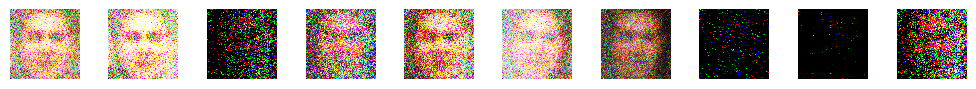

2/2 [==============================] - 0s 25ms/step
Epoch 370/10000, D Loss: 0.4000433199107647, G Loss: 1.6890381315803893e-09
2/2 [==============================] - 0s 22ms/step
Epoch 371/10000, D Loss: 0.367004606872797, G Loss: 1.2371953461709495e-09
2/2 [==============================] - 0s 22ms/step
Epoch 372/10000, D Loss: 0.35619382560253143, G Loss: 4.486516991253353e-10
2/2 [==============================] - 0s 22ms/step
Epoch 373/10000, D Loss: 0.3372802622616291, G Loss: 5.242161912888399e-11
2/2 [==============================] - 0s 22ms/step
Epoch 374/10000, D Loss: 0.3414722830057144, G Loss: 1.6874820429890747e-09
2/2 [==============================] - 0s 23ms/step
Epoch 375/10000, D Loss: 0.322817575186491, G Loss: 1.2156189388434768e-09
2/2 [==============================] - 0s 22ms/step
Epoch 376/10000, D Loss: 0.35643792524933815, G Loss: 4.350133142594359e-09
2/2 [==============================] - 0s 22ms/step
Epoch 377/10000, D Loss: 0.29581785947084427, G Loss: 4

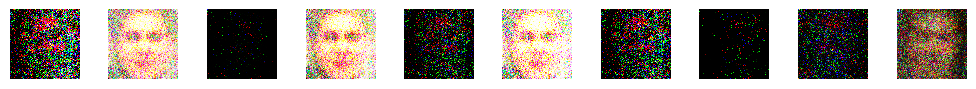

2/2 [==============================] - 0s 21ms/step
Epoch 380/10000, D Loss: 0.3716883026063442, G Loss: 9.705595216402685e-10
2/2 [==============================] - 0s 22ms/step
Epoch 381/10000, D Loss: 0.3677274566143751, G Loss: 1.1679496481065144e-08
2/2 [==============================] - 0s 22ms/step
Epoch 382/10000, D Loss: 0.402645593509078, G Loss: 3.6049813134653164e-10
2/2 [==============================] - 0s 22ms/step
Epoch 383/10000, D Loss: 0.38197411596775055, G Loss: 3.4214411304134273e-09
2/2 [==============================] - 0s 22ms/step
Epoch 384/10000, D Loss: 0.35709838941693306, G Loss: 1.1576767322551973e-09
2/2 [==============================] - 0s 22ms/step
Epoch 385/10000, D Loss: 0.3715463988482952, G Loss: 9.76431047128301e-10
2/2 [==============================] - 0s 22ms/step
Epoch 386/10000, D Loss: 0.3489527553319931, G Loss: 9.359510944051408e-10
2/2 [==============================] - 0s 23ms/step
Epoch 387/10000, D Loss: 0.3405063468962908, G Loss: 4.

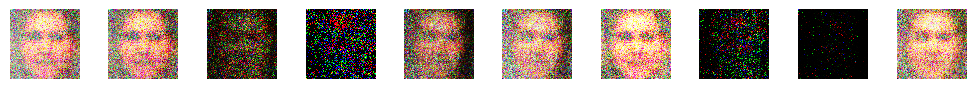

2/2 [==============================] - 0s 22ms/step
Epoch 390/10000, D Loss: 0.33042752370238304, G Loss: 2.248320285502814e-08
2/2 [==============================] - 0s 22ms/step
Epoch 391/10000, D Loss: 0.3603195287287235, G Loss: 4.813112575163814e-09
2/2 [==============================] - 0s 22ms/step
Epoch 392/10000, D Loss: 0.3387972414493561, G Loss: 5.511298639682138e-10
2/2 [==============================] - 0s 22ms/step
Epoch 393/10000, D Loss: 0.40445832163095474, G Loss: 4.00007182932427e-09
2/2 [==============================] - 0s 22ms/step
Epoch 394/10000, D Loss: 0.3542691729962826, G Loss: 7.408173186007616e-09
2/2 [==============================] - 0s 22ms/step
Epoch 395/10000, D Loss: 0.4205474704504013, G Loss: 5.213798837111483e-11
2/2 [==============================] - 0s 22ms/step
Epoch 396/10000, D Loss: 0.3489881716668606, G Loss: 7.899916276699059e-10
2/2 [==============================] - 0s 22ms/step
Epoch 397/10000, D Loss: 0.331717886030674, G Loss: 1.7207

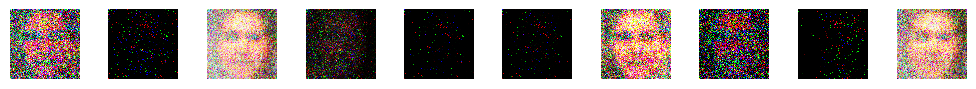

2/2 [==============================] - 0s 22ms/step
Epoch 400/10000, D Loss: 0.29905546456575394, G Loss: 5.9949227804168e-09
2/2 [==============================] - 0s 22ms/step
Epoch 401/10000, D Loss: 0.3579307459294796, G Loss: 3.830410655325522e-09
2/2 [==============================] - 0s 22ms/step
Epoch 402/10000, D Loss: 0.37180250883102417, G Loss: 1.7724581802269768e-09
2/2 [==============================] - 0s 23ms/step
Epoch 403/10000, D Loss: 0.33874766156077385, G Loss: 1.8879551255679416e-09
2/2 [==============================] - 0s 22ms/step
Epoch 404/10000, D Loss: 0.38199928775429726, G Loss: 3.060234732288336e-09
2/2 [==============================] - 0s 22ms/step
Epoch 405/10000, D Loss: 0.3463133852928877, G Loss: 3.7391387763818784e-09
2/2 [==============================] - 0s 22ms/step
Epoch 406/10000, D Loss: 0.3488461263477802, G Loss: 1.5732943836610502e-09
2/2 [==============================] - 0s 22ms/step
Epoch 407/10000, D Loss: 0.38016944751143456, G Loss:

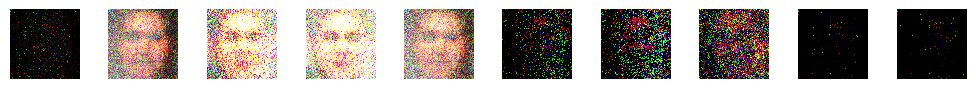

2/2 [==============================] - 0s 22ms/step
Epoch 410/10000, D Loss: 0.33707451075315475, G Loss: 3.2396019200575665e-10
2/2 [==============================] - 0s 22ms/step
Epoch 411/10000, D Loss: 0.4040861167013645, G Loss: 1.2180867869915346e-08
2/2 [==============================] - 0s 22ms/step
Epoch 412/10000, D Loss: 0.34961117431521416, G Loss: 9.217576701914254e-10
2/2 [==============================] - 0s 22ms/step
Epoch 413/10000, D Loss: 0.37916848435997963, G Loss: 1.6233457633685333e-10
2/2 [==============================] - 0s 22ms/step
Epoch 414/10000, D Loss: 0.37420301139354706, G Loss: 3.5750399862699567e-10
2/2 [==============================] - 0s 22ms/step
Epoch 415/10000, D Loss: 0.34319435991346836, G Loss: 2.7644955213901312e-09
2/2 [==============================] - 0s 22ms/step
Epoch 416/10000, D Loss: 0.4111831448972225, G Loss: 1.3071829174648997e-09
2/2 [==============================] - 0s 22ms/step
Epoch 417/10000, D Loss: 0.3347817100584507, G L

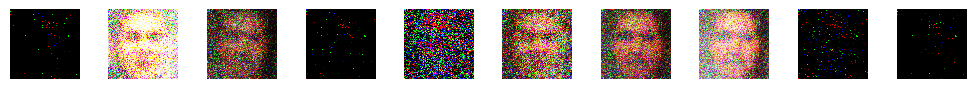

2/2 [==============================] - 0s 22ms/step
Epoch 420/10000, D Loss: 0.4197544902563095, G Loss: 3.633666700864069e-09
2/2 [==============================] - 0s 22ms/step
Epoch 421/10000, D Loss: 0.31344936788082123, G Loss: 1.5636659744799886e-09
2/2 [==============================] - 0s 22ms/step
Epoch 422/10000, D Loss: 0.38483988866209984, G Loss: 4.6511466900156506e-10
2/2 [==============================] - 0s 22ms/step
Epoch 423/10000, D Loss: 0.3958106357604265, G Loss: 1.4911329115907535e-10
2/2 [==============================] - 0s 22ms/step
Epoch 424/10000, D Loss: 0.38132553547620773, G Loss: 2.2416297984495515e-10
2/2 [==============================] - 0s 22ms/step
Epoch 425/10000, D Loss: 0.4397852420806885, G Loss: 1.422044010324086e-10
2/2 [==============================] - 0s 22ms/step
Epoch 426/10000, D Loss: 0.404841385781765, G Loss: 2.964342105116202e-10
2/2 [==============================] - 0s 22ms/step
Epoch 427/10000, D Loss: 0.33720167726278305, G Loss:

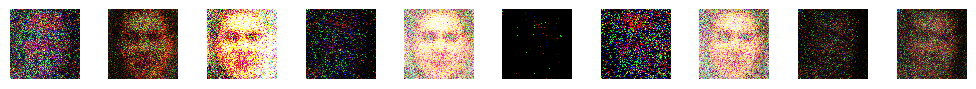

2/2 [==============================] - 0s 23ms/step
Epoch 430/10000, D Loss: 0.3526538051664829, G Loss: 6.4470460081622605e-09
2/2 [==============================] - 0s 22ms/step
Epoch 431/10000, D Loss: 0.3675110023468733, G Loss: 3.663453762570157e-09
2/2 [==============================] - 0s 24ms/step
Epoch 432/10000, D Loss: 0.3639708701521158, G Loss: 2.5820139359922223e-09
2/2 [==============================] - 0s 22ms/step
Epoch 433/10000, D Loss: 0.31781203113496304, G Loss: 3.1442042303098106e-09
2/2 [==============================] - 0s 22ms/step
Epoch 434/10000, D Loss: 0.3044362310320139, G Loss: 3.9460917866662726e-10
2/2 [==============================] - 0s 23ms/step
Epoch 435/10000, D Loss: 0.3737916424870491, G Loss: 6.867607371674467e-09
2/2 [==============================] - 0s 22ms/step
Epoch 436/10000, D Loss: 0.33253050222992897, G Loss: 1.729875270806147e-10
2/2 [==============================] - 0s 22ms/step
Epoch 437/10000, D Loss: 0.3277529589831829, G Loss: 

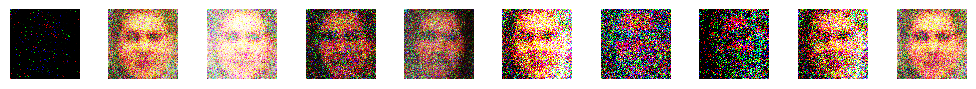

2/2 [==============================] - 0s 22ms/step
Epoch 440/10000, D Loss: 0.3995144125074148, G Loss: 4.600284153610801e-09
2/2 [==============================] - 0s 23ms/step
Epoch 441/10000, D Loss: 0.3279863726347685, G Loss: 1.7299615906463117e-10
2/2 [==============================] - 0s 22ms/step
Epoch 442/10000, D Loss: 0.3643609322607517, G Loss: 2.5216129184713054e-10
2/2 [==============================] - 0s 22ms/step
Epoch 443/10000, D Loss: 0.3270142637193203, G Loss: 3.944067572536625e-10
2/2 [==============================] - 0s 22ms/step
Epoch 444/10000, D Loss: 0.3559441864490509, G Loss: 6.550396669524616e-09
2/2 [==============================] - 0s 22ms/step
Epoch 445/10000, D Loss: 0.3731423169374466, G Loss: 1.2108142266598065e-09
2/2 [==============================] - 0s 22ms/step
Epoch 446/10000, D Loss: 0.33517475239932537, G Loss: 3.5898450878590893e-10
2/2 [==============================] - 0s 22ms/step
Epoch 447/10000, D Loss: 0.3841808456927538, G Loss: 8

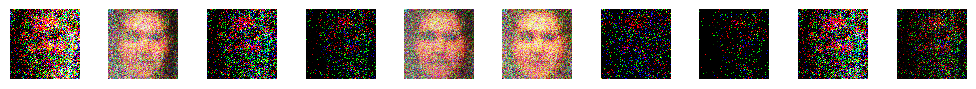

In [6]:
# Continue training
train_gan(loaded_generator, loaded_discriminator, loaded_gan, X_train, epochs=10000, batch_size=50)

In [7]:
loaded_generator.save("generator_model.h5")
loaded_discriminator.save("discriminator_model.h5")
loaded_gan.save("gan_model.h5")